You will receive a csv file called “personal data.csv” from us. 
The file contains information of persons:
- Column 1: the person's national register number
- Column 2: the surname of the person
- Column 3: the first name of the person

A national number has the following format: 
- 3 times 2 digits separated by a dot; this is the date of birth of the person in the form yy.mm.dd (first two digits are the 2 last digits of the year of birth, then a dot, then two digits corresponding to the month of birth, then a dot and then two more digits corresponding to the day of birth)
- A dash “-”
- Three digits: this is serial number to distinguish persons born on the same day; women get an even serial number, men an odd serial number
- One dot
- Two digits that act as a control number; how this control is done is not important for this statement
A woman born on July 28, 1994 might have the following national registry number: 
94.07.28-124.89.
We wish to create an application to create an overview of the number of births per day of the week. In this overview, the days of the week are represented by their English names, i.e., from “Monday” to “Sunday.”
In the following, add the necessary pieces of code.

Read the file “personal_data.csv” into a panda Dataframe named “data”

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime
data = pd.read_csv("personal_data.csv")

Check that this is done correctly by showing some of the first rows.

In [159]:
data.head()

,rijksregisternummer;naam;voornaam
0,94.07.25-124.89;Lemmens;Elke
1,96.99.11-133.71;Janssens;Jef
2,02.122.12-122.32;Elen;Marieke
3,99.07.01-005.56;Hendriks;Hendrik
4,93.07.25-1248.89;Lemmens;Elke


Change the national register numbers that do not meet the correct format (for now, consider only good format : 2 digits.2 digits.2 digits-3 digits.2 digits) by None.
Display the first rows again to verify that this was successful.

In [160]:
# Split the 'rijksregisternummer;naam;voornaam' column into separate columns
data[['rijksregisternummer', 'naam', 'voornaam']] = data['rijksregisternummer;naam;voornaam'].str.split(';', expand=True)

# Drop the original column
data = data.drop(columns=['rijksregisternummer;naam;voornaam'])

# Replace the rijksregisternummer that do not meet the correct format with None
data['rijksregisternummer'] = data['rijksregisternummer'].apply(lambda x: None if not re.match(r'^\d{2}\.\d{2}\.\d{2}-\d{3}\.\d{2}$', x) else x)

# Display the first rows to verify
data.head()

,rijksregisternummer,naam,voornaam
0,94.07.25-124.89,Lemmens,Elke
1,96.99.11-133.71,Janssens,Jef
2,None,Elen,Marieke
3,99.07.01-005.56,Hendriks,Hendrik
4,None,Lemmens,Elke


Change the registry numbers whose first 8 characters do not match a date by None.
Display the first rows again to verify that this was successful.

In [161]:
# Changing the registry numbers
data['rijksregisternummer'] = data['rijksregisternummer'].apply(lambda x: None if x is None or not re.match(r'^\d{2}\.(0[1-9]|1[0-2])\.(0[1-9]|[1-2][0-9]|3[0-1])-\d{3}\.\d{2}$', x) else x)

# Correct output
data.head()

,rijksregisternummer,naam,voornaam
0,94.07.25-124.89,Lemmens,Elke
1,None,Janssens,Jef
2,None,Elen,Marieke
3,99.07.01-005.56,Hendriks,Hendrik
4,None,Lemmens,Elke


Delete the rows in the data frame in which the value None appears in one of the columns.
Display the first rows again to verify that this was successful.

In [162]:
data = data.dropna()
data.head()

,rijksregisternummer,naam,voornaam
0,94.07.25-124.89,Lemmens,Elke
3,99.07.01-005.56,Hendriks,Hendrik
5,00.10.11-133.71,Janssens,Jef
7,89.07.01-005.56,Hendriks,Hendrik
8,99.07.25-124.89,Lemmens,Elke


Modify the dataframe by adding a column named “date of birth” representing the date of birth as a datetime object.
Display the first rows again to verify that this was successful.

In [163]:
# Function to convert the date part of the rijksregisternummer to a datetime object
def convert_to_date(rijksregisternummer):
    if rijksregisternummer is not None:
        date_part = rijksregisternummer.split('-')[0]
        year = int(date_part[:2])
        month = int(date_part[3:5])
        day = int(date_part[6:8])
        # Handle years from 2000 and onwards
        if year > 21:
            year += 1900
        else:
            year += 2000
        return datetime.date(year, month, day)
    else:
        return None

# Add the "date of birth" column
data['date of birth'] = data['rijksregisternummer'].apply(convert_to_date)

# Display the first rows to verify
data.head()

,rijksregisternummer,naam,voornaam,date of birth
0,94.07.25-124.89,Lemmens,Elke,1994-07-25
3,99.07.01-005.56,Hendriks,Hendrik,1999-07-01
5,00.10.11-133.71,Janssens,Jef,2000-10-11
7,89.07.01-005.56,Hendriks,Hendrik,1989-07-01
8,99.07.25-124.89,Lemmens,Elke,1999-07-25


Modify the data frame by adding a column named “day” that represents the day in the week that the person was born; the days are the English names for the days.
Display the first rows again to verify that this was successful.

In [164]:
# Convert 'date of birth' to datetime
data['date of birth'] = pd.to_datetime(data['date of birth'])

# Add the "day" column
data['day'] = data['date of birth'].dt.day_name()

# Display the first rows to verify
data.head()

,rijksregisternummer,naam,voornaam,date of birth,day
0,94.07.25-124.89,Lemmens,Elke,1994-07-25,Monday
3,99.07.01-005.56,Hendriks,Hendrik,1999-07-01,Thursday
5,00.10.11-133.71,Janssens,Jef,2000-10-11,Wednesday
7,89.07.01-005.56,Hendriks,Hendrik,1989-07-01,Saturday
8,99.07.25-124.89,Lemmens,Elke,1999-07-25,Sunday


Run next piece of code.

In [165]:
data["day"] = pd.Categorical(data["day"],["Monday","Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"])
data.head()

,rijksregisternummer,naam,voornaam,date of birth,day
0,94.07.25-124.89,Lemmens,Elke,1994-07-25,Monday
3,99.07.01-005.56,Hendriks,Hendrik,1999-07-01,Thursday
5,00.10.11-133.71,Janssens,Jef,2000-10-11,Wednesday
7,89.07.01-005.56,Hendriks,Hendrik,1989-07-01,Saturday
8,99.07.25-124.89,Lemmens,Elke,1999-07-25,Sunday


Show a visual overview in the form of a histogram of the number of births by day of the week. 

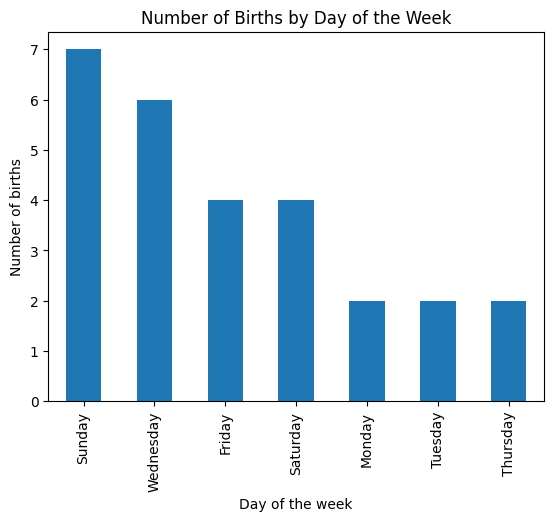

In [169]:
import numpy as np

births_by_day = data['day'].value_counts()

births_by_day.plot(kind='bar')

plt.title('Number of Births by Day of the Week')
plt.xlabel('Day of the week')
plt.ylabel('Number of births')
plt.show()